In [2]:
#Installment
!pip install tensorflow
!pip install pillow
!pip install scipy
!pip install matplotlib

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/fb/59/3eb58629e3749d9f4fc1e522487af369f9bd4c451f465d3054961fab6bf8/tensorflow-2.13.1-cp38-cp38-win_amd64.whl.metadata
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/5b/6f/8b125d126d54061c0be610b135aaf2f8960f55c2e185ac32445e4a5012d5/tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/38/ba/dd4d998a852451e98dc009ecb208bbb0eeb0c8252dc35b7c4e1050762b36/tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.w

  Obtaining dependency information for pillow from https://files.pythonhosted.org/packages/b8/da/ce52661f951562cbef4dad2809f2ade9e04e7ebc0afa86ec402a8bc89225/Pillow-10.1.0-cp38-cp38-win_amd64.whl.metadata
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB 1.3 MB/s eta 0:00:03
   --------- ------------------------------ 0.6/2.6 MB 7.5 MB/s eta 0:00:01
   ------------------------ --------------- 1.6/2.6 MB 14.7 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 15.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/42.2 MB 2.2 MB/s eta 0:00:20
      --------------------------------------- 0.9/42.2 MB 9.0 MB/s eta 0:00:05
     - -------------------------------------- 2.1/42.2 MB 14.8 MB/s eta 0:00:03
     --- ------------------------------------ 3.4/42.2 MB 18.1 MB/s eta 0:00:03
     ---- --------------------

In [7]:
import tensorflow as tf
import PIL
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np
from subprocess import call
import scipy
import matplotlib.pyplot as plt
from matplotlib import cm
import math
from decimal import Decimal, localcontext

from pathlib import Path




def opF(path):
    p = Path(path)
    os.startfile(p)

In [8]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [9]:
#Similarity Rate Comparison

model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=True, 
  pooling='avg'
)

StreetView_Path = "Resources/StreetView-01.jpg"
opF(StreetView_Path)

StreetView_image = load_image(StreetView_Path)
featureStreetView = model.predict(StreetView_image)[0]

1/1 [==============================] - 1s 546ms/step


In [10]:
featureStreetView.size

1000

In [12]:
featureStreetView

array([1.34264042e-07, 2.13143878e-07, 1.18680363e-08, 6.43921538e-08,
       1.55249325e-08, 1.07906310e-07, 1.27452751e-08, 3.22491786e-07,
       1.42315162e-06, 2.47394183e-07, 3.59902174e-07, 3.06801383e-07,
       4.69677216e-05, 1.86488171e-06, 4.57861142e-06, 3.32917807e-06,
       5.80103347e-07, 2.57073395e-07, 2.21954519e-06, 4.62739195e-07,
       3.91079027e-07, 5.37672122e-07, 1.14192483e-06, 8.69045107e-06,
       3.67946122e-05, 6.25738039e-07, 1.12915863e-07, 1.52786606e-06,
       5.09114848e-08, 1.96192076e-07, 3.16612130e-07, 3.93238633e-06,
       2.16995062e-07, 2.23846087e-07, 7.58601999e-08, 1.68791144e-06,
       3.20213690e-06, 6.81797428e-06, 2.40717469e-07, 4.50862615e-07,
       2.94352412e-05, 4.01693683e-07, 4.14593251e-06, 3.48359572e-06,
       2.90002754e-06, 5.43474357e-07, 4.43643057e-06, 4.70601265e-07,
       2.74736703e-06, 8.25493558e-08, 2.08325800e-05, 1.74565173e-06,
       3.08242534e-07, 7.95103645e-08, 1.77767859e-07, 1.60893435e-07,
      

In [13]:
StreetView02 = "Resources/StreetView-02.jpg"
opF(StreetView02)
StreetView02_image = load_image(StreetView02)
featureStreetView02 = model.predict(StreetView02_image)[0]

StreetView03 = "Resources/StreetView-03.jpg"
opF(StreetView03)
StreetView03_image = load_image(StreetView03)
featureStreetView03 = model.predict(StreetView03_image)[0]

1/1 [==============================] - 0s 67ms/step


In [14]:
np.linalg.norm(featureStreetView - featureStreetView02)

0.61743075

In [15]:
np.linalg.norm(featureStreetView - featureStreetView03)

0.65840596

In [16]:
np.linalg.norm(featureStreetView02 - featureStreetView03)

0.82597256

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, Softmax
from tensorflow.keras.applications import mobilenet as _mobilenet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
#Image Classification

model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

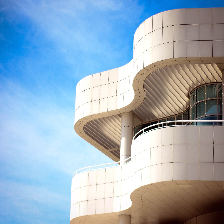

In [41]:
highrise_image_id = os.listdir('Images/highrise')[0]
highrise_path = os.path.join('Images/highrise',highrise_image_id)
highrise_image = load_image(highrise_path)

tf.keras.preprocessing.image.load_img(highrise_path, target_size=(224,224))

house_image_id = os.listdir('Images/house')[0]
house_path = os.path.join('Images/house',house_image_id)
house_image = load_image(house_path)

tf.keras.preprocessing.image.load_img(house_path, target_size=(224,224))

historic_image_id = os.listdir('Images/historic')[0]
historic_path = os.path.join('Images/historic',historic_image_id)
historic_image = load_image(historic_path)

tf.keras.preprocessing.image.load_img(historic_path, target_size=(224,224))

curve_image_id = os.listdir('Images/curve')[0]
curve_path = os.path.join('Images/curve',curve_image_id)
curve_image = load_image(curve_path)

tf.keras.preprocessing.image.load_img(curve_path, target_size=(224,224))

# Continue without the last layer

In [43]:
model = tf.keras.applications.mobilenet.MobileNet(

  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

In [44]:
x = Dropout(rate=0.4)(model.output)
# This determines the number of outputs, and thus the number of categories, in my test case 2: dog or cat
x = Dense(4)(x)
x = Softmax()(x)
model= Model(model.inputs, x)

In [45]:
for layer in model.layers[:-3]:
    layer.trainable = False

In [46]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy'
)

In [47]:
datagen = ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    'Images', 
    target_size=(224, 224),
    save_to_dir='./training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    'Images',
    target_size=(224, 224),
    save_to_dir='./validation_aug',
    subset='validation'
)

Found 140 images belonging to 4 classes.
Found 14 images belonging to 4 classes.


In [52]:
batch_size = 32
epochs=6

history = model.fit(
    x=training,
    steps_per_epoch=training.samples // batch_size,
    epochs=epochs,
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

Epoch 1/6
4/4 [==============================] - 9s 2s/step - loss: 0.4697
Epoch 2/6
4/4 [==============================] - 7s 2s/step - loss: 0.3629
Epoch 3/6
4/4 [==============================] - 7s 2s/step - loss: 0.3528
Epoch 4/6
4/4 [==============================] - 8s 2s/step - loss: 0.3052
Epoch 5/6
4/4 [==============================] - 10s 2s/step - loss: 0.2248
Epoch 6/6
4/4 [==============================] - 8s 2s/step - loss: 0.2630


1/1 [==============================] - 2s 2s/step - loss: 0.2501
Validation Loss: 0.25007402896881104


KeyError: 'val_loss'

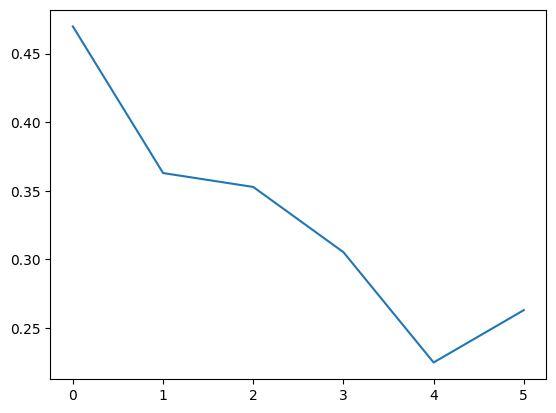

In [57]:
validation_loss = model.evaluate(validation, steps=max(1, validation.samples // batch_size))
print(f'Validation Loss: {validation_loss}')

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print(history.history)

In [58]:
random_highrise = random.choice(os.listdir('Images/highrise'))
highrise_path = os.path.join('Images/highrise',random_highrise)
highrise = load_image(highrise_path)

random_house = random.choice(os.listdir('Images/house'))
house_path = os.path.join('Images/house',random_house)
house = load_image(house_path)

random_historic = random.choice(os.listdir('Images/historic'))
historic_path = os.path.join('Images/historic',random_historic)
historic = load_image(historic_path)

random_curve = random.choice(os.listdir('Images/curve'))
curve_path = os.path.join('Images/curve',random_curve)
curve = load_image(curve_path)

tf.keras.preprocessing.image.load_img(highrise_path, target_size=(224,224))
tf.keras.preprocessing.image.load_img(house_path, target_size=(224,224))
tf.keras.preprocessing.image.load_img(historic_path, target_size=(224,224))
tf.keras.preprocessing.image.load_img(curve_path, target_size=(224,224))

print(f'''highrise:{np.round(model.predict(highrise),4)}''')
print(f'''house:{np.round(model.predict(house),4)}''')
print(f'''historic:{np.round(model.predict(historic),4)}''')
print(f'''curve:{np.round(model.predict(curve),4)}''')

1/1 [==============================] - 1s 650ms/step
highrise:[[6.890e-02 9.176e-01 1.300e-02 4.000e-04]]
1/1 [==============================] - 0s 84ms/step
house:[[0.0488 0.0039 0.0902 0.8571]]
1/1 [==============================] - 0s 62ms/step
historic:[[6.000e-04 5.000e-04 9.505e-01 4.840e-02]]
1/1 [==============================] - 0s 65ms/step
curve:[[0.8081 0.1715 0.0149 0.0054]]


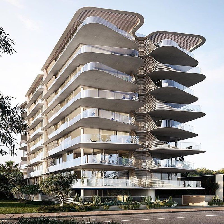

In [62]:
thisisatest2_path = 'Images/thisisatest2.jpg'
thisisatest2 = load_image(thisisatest2_path)
tf.keras.preprocessing.image.load_img(thisisatest2_path, target_size=(224,224))

In [63]:
print(f'''thisisatest2:{np.round(model.predict(thisisatest2),2)}''')

1/1 [==============================] - 0s 47ms/step
thisisatest2:[[0.92 0.06 0.01 0.01]]


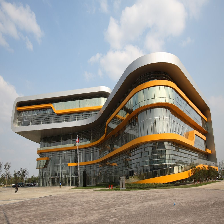

In [64]:
thisisatest3_path = 'Images/thisisatest3.jpg'
thisisatest3 = load_image(thisisatest3_path)
tf.keras.preprocessing.image.load_img(thisisatest3_path, target_size=(224,224))

In [65]:
print(f'''thisisatest3:{np.round(model.predict(thisisatest3),2)}''')

1/1 [==============================] - 0s 68ms/step
thisisatest3:[[0.98 0.01 0.01 0.  ]]


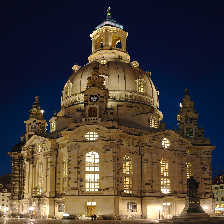

In [66]:
thisisatest4_path = 'Images/thisisatest4.jpg'
thisisatest4 = load_image(thisisatest4_path)
tf.keras.preprocessing.image.load_img(thisisatest4_path, target_size=(224,224))

In [68]:
print(f'''thisisatest4:{np.round(model.predict(thisisatest4),2)}''')

1/1 [==============================] - 0s 78ms/step
thisisatest4:[[0.01 0.   0.98 0.  ]]


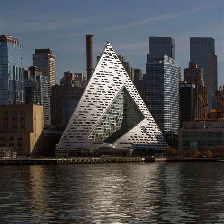

In [69]:
finaltest_path = 'Images/finaltest.jpg'
finaltest = load_image(finaltest_path)
tf.keras.preprocessing.image.load_img(finaltest_path, target_size=(224,224))

In [70]:
print(f'''finaltest:{np.round(model.predict(finaltest),2)}''')

1/1 [==============================] - 0s 59ms/step
finaltest:[[0.22 0.41 0.36 0.  ]]
